In [54]:
from pyspark.sql import *
sqlContext = SQLContext(sc)

df = sqlContext.read.format('jdbc').options(  
        url="jdbc:mysql://localhost:3306/supermarketdemosmall",
        dbtable="view_sale_info",
        driver="com.mysql.jdbc.Driver",
        user="root",
        password="C@ppadre5").load()


In [55]:
#from pyspark.sql.functions import col, max as max_
####### make selections
# select store, range: 1 to 150
store_id = "1" 
df = df.filter(df.store_id == store_id)
df.select("store_id").show(5)
# slice dataframe and get minimum value
store_min = df.agg({"timestamp": "min"}).collect()[0][0]
store_max = df.agg({"timestamp": "max"}).collect()[0][0]
print("Enter a start date date between {} and {}".format(store_min,store_max))
print("Enter an end date later than or equal to your start date")

+--------+
|store_id|
+--------+
|       1|
|       1|
|       1|
|       1|
|       1|
+--------+
only showing top 5 rows

Enter a start date date between 2011-01-01 06:00:57 and 2017-12-11 22:15:11
Enter an end date later than or equal to your start date


In [56]:
from datetime import datetime
from pyspark.sql.functions import datediff, lit, udf
import pyspark.sql.functions as F 
#enter start and end date
startdate = "2016-05-05"
enddate = "2017-11-11"
#convert to datetime
startdate = datetime.strptime(startdate,'%Y-%m-%d')
enddate = datetime.strptime(enddate,'%Y-%m-%d')
#if startdate greater than enddate make enddate today
if(startdate > enddate):
    enddate = datetime.today().date()
    
#filter by dates
df = df.filter((df.timestamp >= startdate) & (df.timestamp >= enddate))



<IPython.core.display.Javascript object>


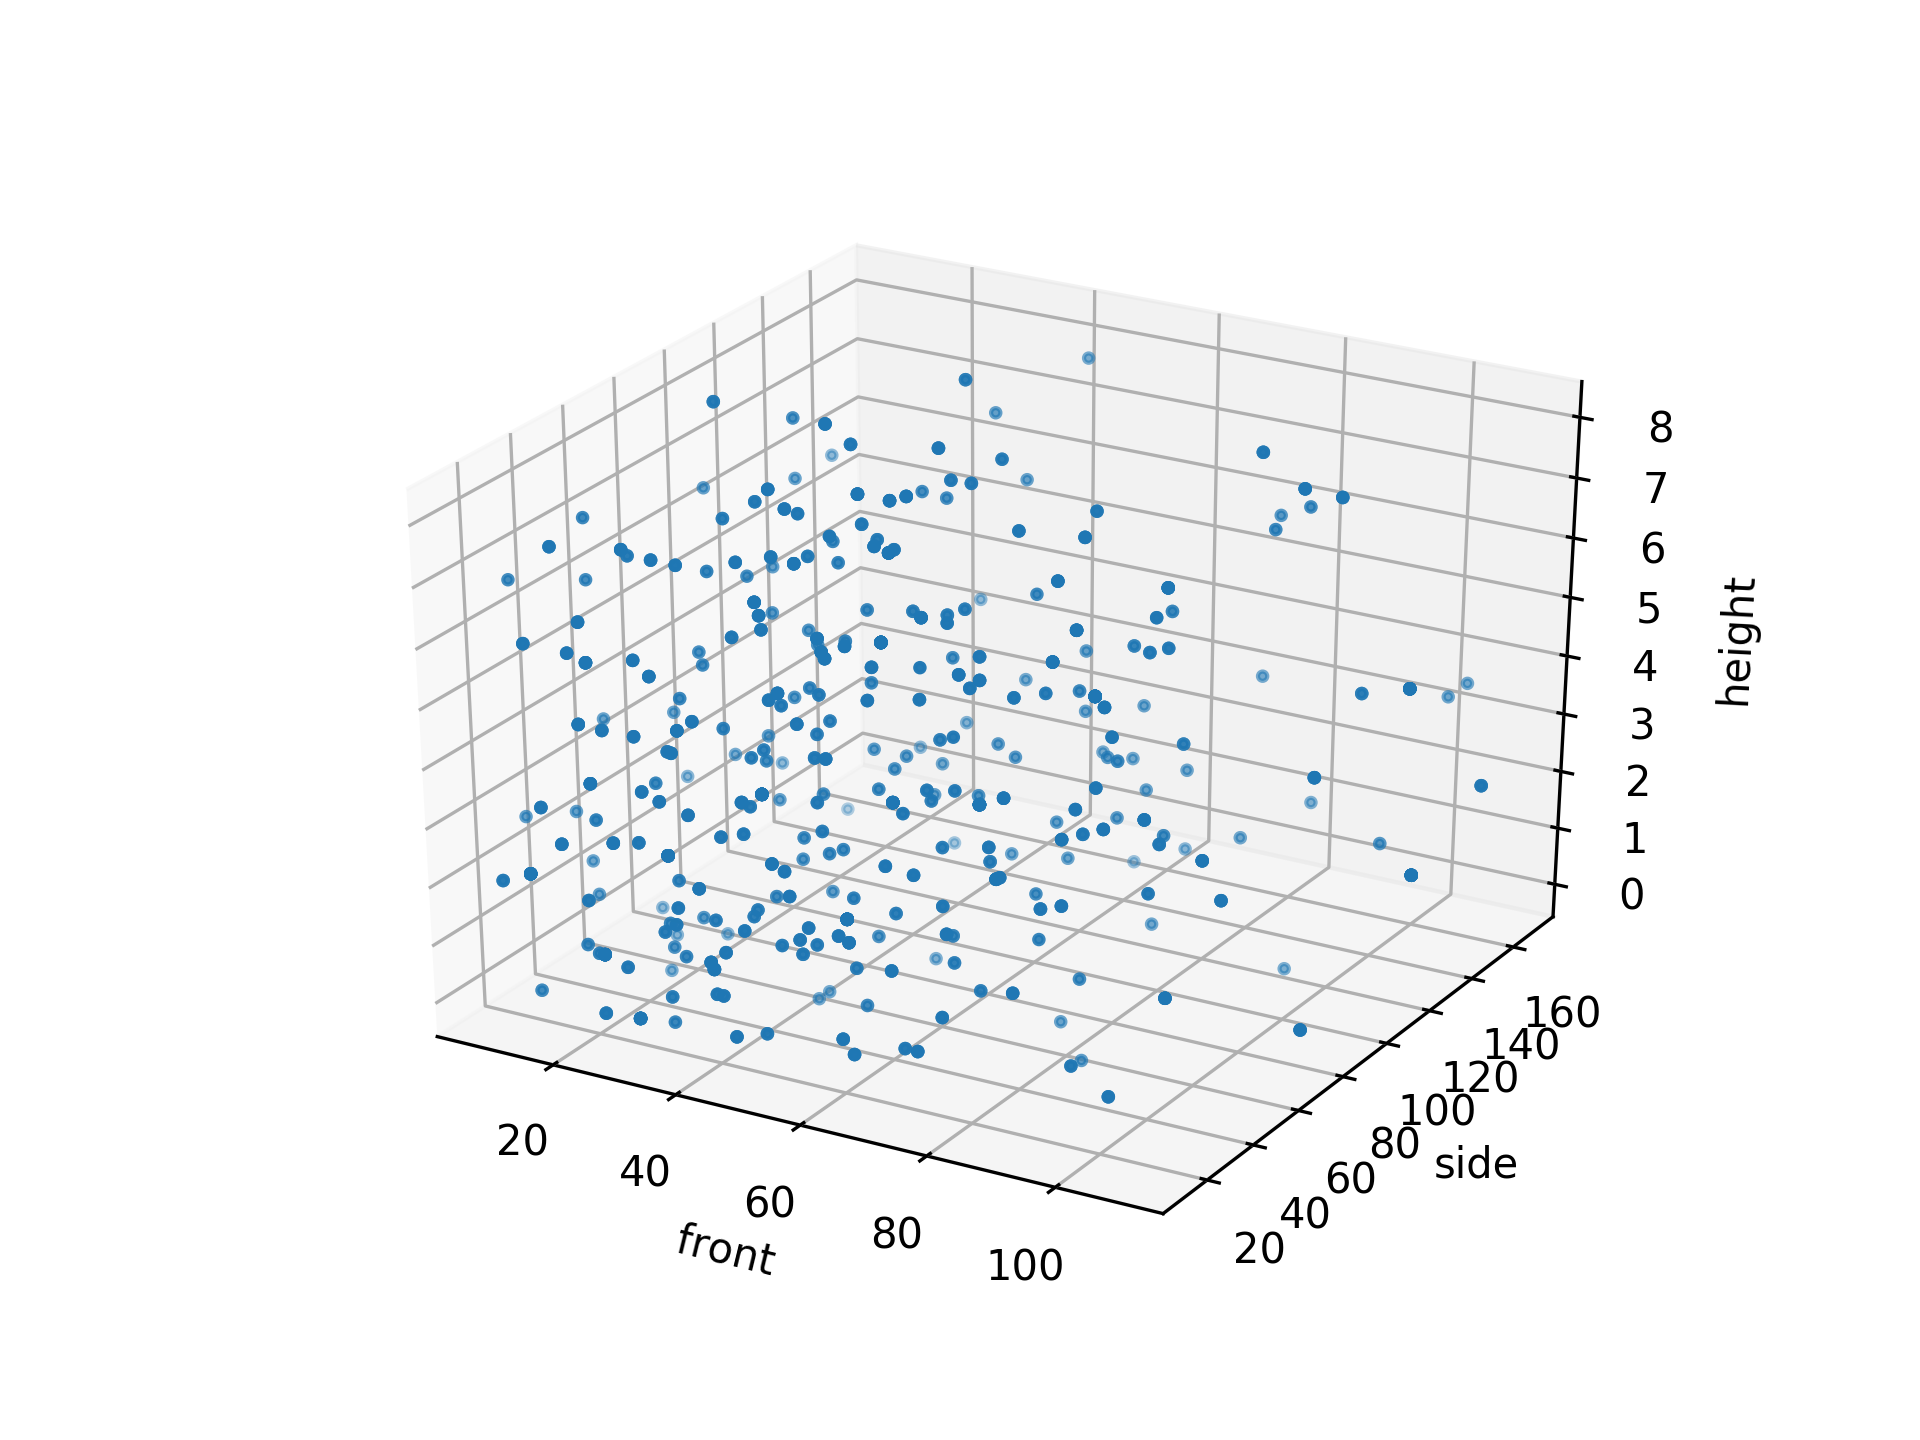

In [57]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from random import randrange, uniform


#get the store dimensions from one row only
#width, length, height = df.select('store_width','store_length','store_height').head()

#  setup the figure
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')


#make a vector of the dimensions  
df = df.withColumn('xs', uniform(df.width_startpoint,df.width_endpoint))
df = df.withColumn('ys', uniform(df.length_startpoint,df.length_endpoint))
pdf = df.toPandas() # to pandas dataframe and then to list for plotting

xs = pdf['xs'].tolist()
ys = pdf['ys'].tolist()
zs = pdf['height'].tolist()

ax.scatter(xs,ys,zs, s=5)
ax.set_xlabel('front')
ax.set_ylabel('side')
ax.set_zlabel('height')


<IPython.core.display.Javascript object>


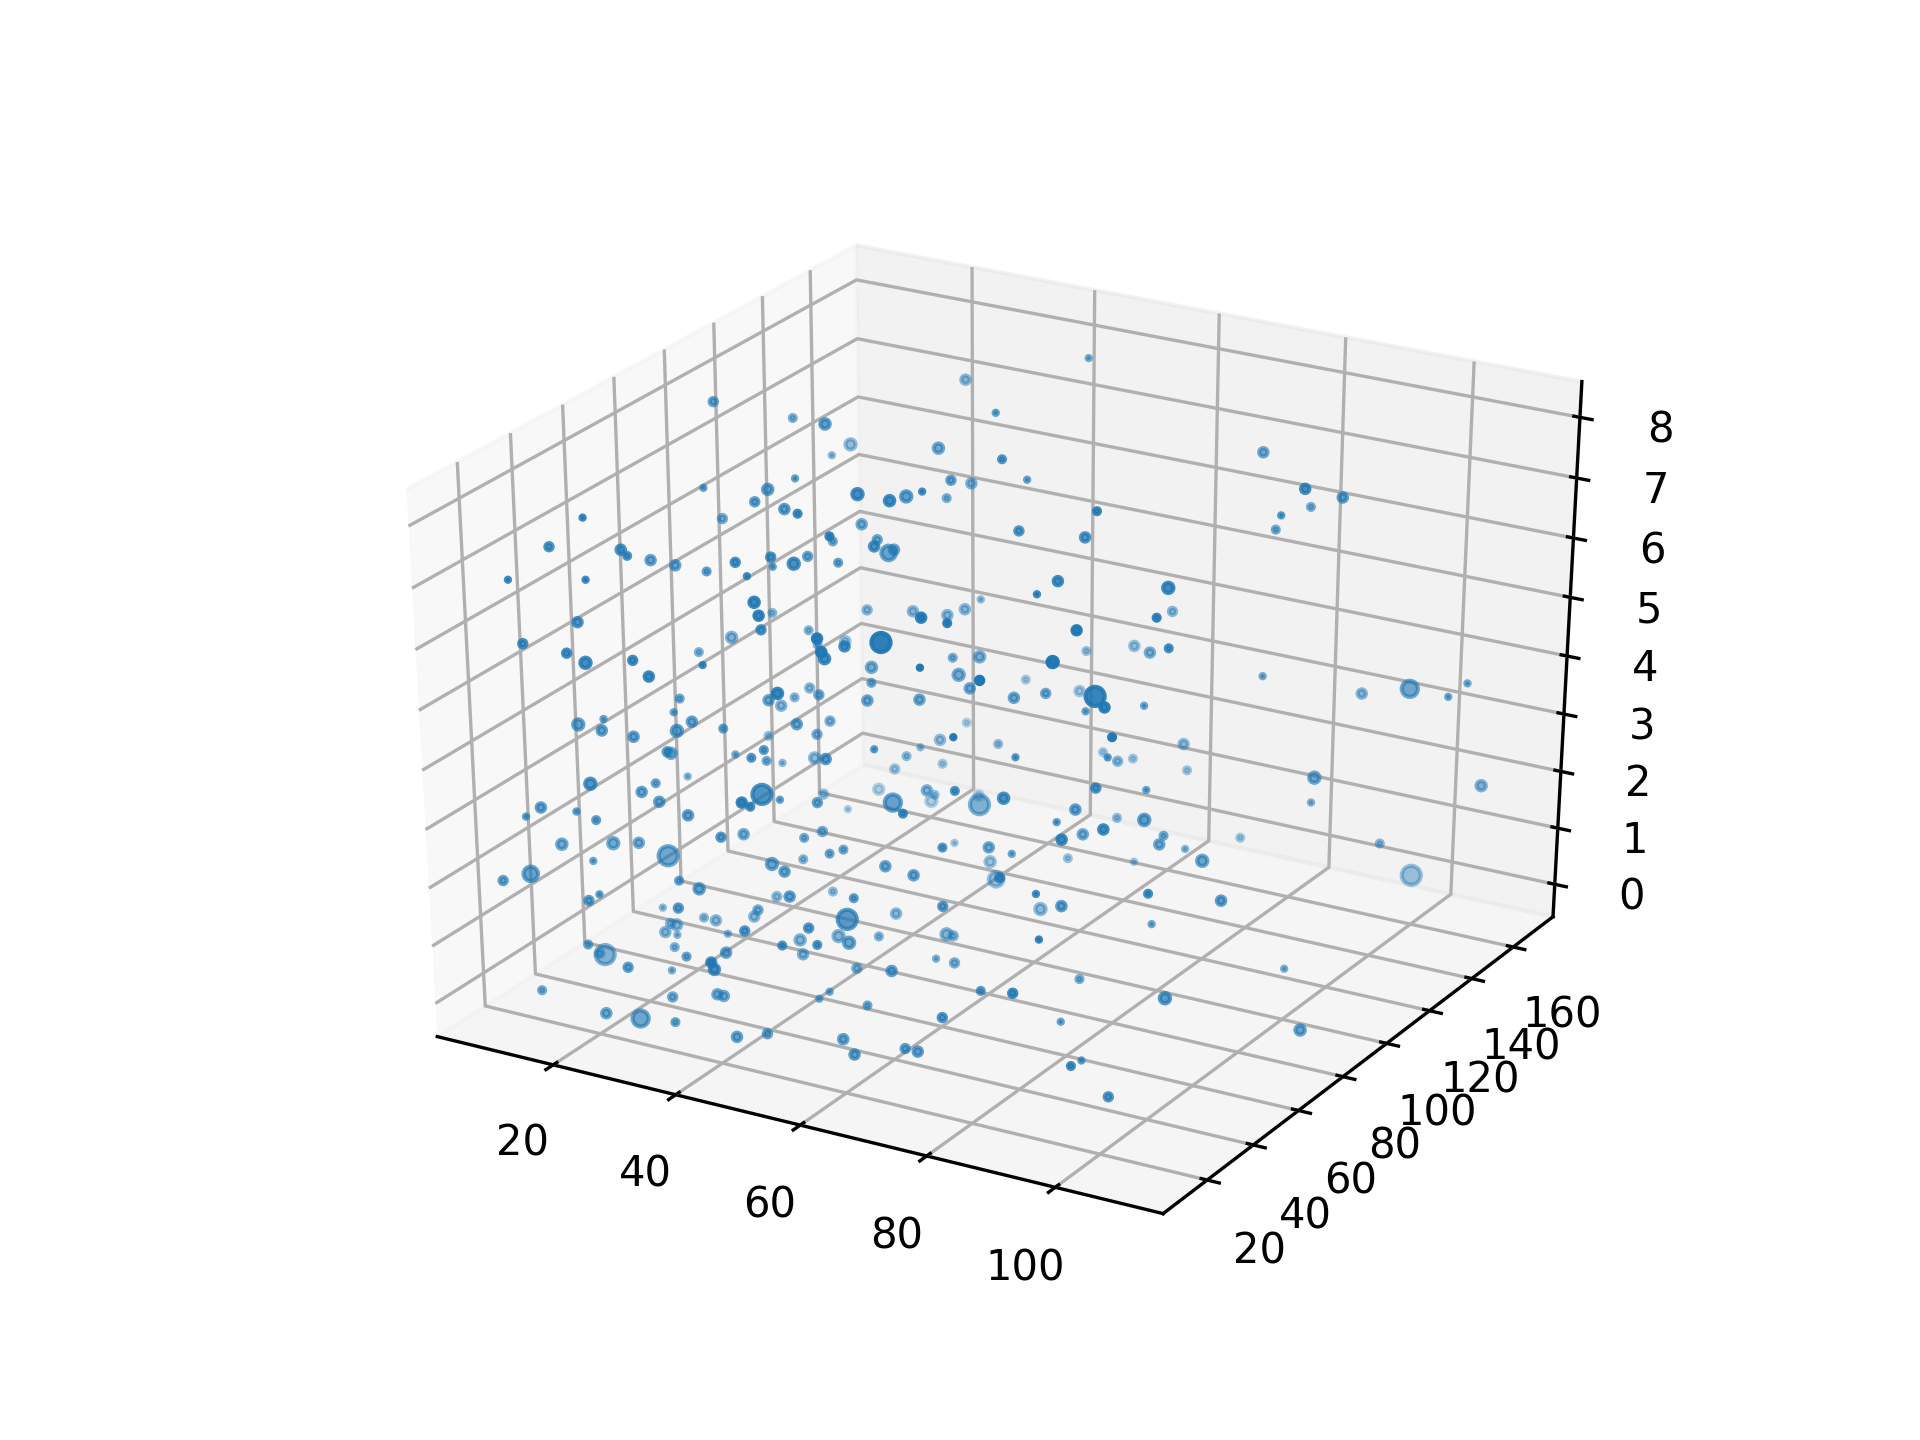

In [58]:
from pyspark.sql.functions import first, collect_list, mean, count


df = df.groupBy('shelf_id').agg({'xs':'mean', 
                                 'ys':'mean',
                                 'item_id':'count',
                                 'height' :'mean'})
pdf = df.toPandas() # to pandas dataframe and then to list for plotting

xs = pdf['avg(xs)'].tolist()
ys = pdf['avg(ys)'].tolist()
zs = pdf['avg(height)'].tolist()
size = pdf['count(item_id)'].tolist()

#  setup the figure
fig1 = plt.figure()
ax1 = fig1.add_subplot(111,projection='3d')

ax1.scatter(xs,ys,zs,s=size)
ax.set_xlabel('front')
ax.set_ylabel('side')
ax.set_zlabel('height')
